In [2]:
import numpy as np
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import VOCSegmentation

In [5]:
# dataset = VOCSegmentation(root='./data/PASCALVOC', year='2012', image_set='train', transform=transforms.ToTensor(), target_transform=transforms.ToTensor())
dataset = VOCSegmentation(root='./data/PASCALVOC', year='2012', image_set='train', transform=None, target_transform=None)

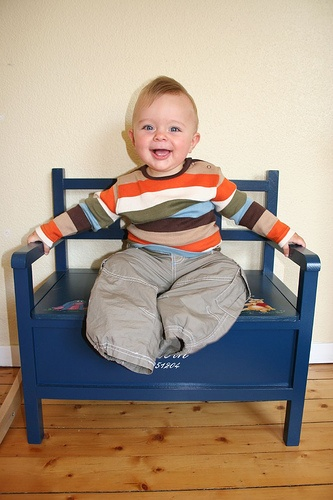

In [7]:
image, target = dataset[100]



In [ ]:
target_np = target.numpy()
counts = np.unique(target_np, return_counts=True)
list(counts)


In [52]:
num_classes = 21
count = np.zeros(num_classes)
# for idx, item in enumerate(dataset):
for idx in range(20):
    label = np.array(dataset[idx][1])
    dist = np.bincount(label.flatten(), minlength=num_classes)
    count += dist
count
    


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[129545   4734      0      0      0      0      0      0      0      0
      0      0      0      0      0    866      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0

ValueError: operands could not be broadcast together with shapes (21,) (256,) (21,) 

In [23]:
target_np = target.detach().numpy()
np.bincount(target.flatten(), minlength=21)

array([179485,   8015,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0], dtype=int64)

## Visualize with matplotlib

In [24]:
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])



In [7]:
# read image
from pathlib import Path
import os
from torchvision.io import read_image

IMG_DIR = Path('./data/PASCALVOC/VOCdevkit/VOC2012/JPEGImages')
x = os.listdir(IMG_DIR)
img = read_image(str(IMG_DIR / x[0])) # Takes path to image and return Tensor

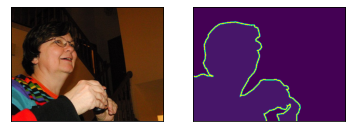

In [27]:
image, target = dataset[200]
show([image, target])

In [10]:
target.detach().numpy()

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)